# **QUESTION FORMULATION**

---

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Raw Data**

In [2]:
weather_path = "../data/raw/weatherAUS.csv"
df_weather = pd.read_csv(weather_path)

## **Question 4**

### **1. The question**

*Liệu chỉ số tương tác động lực gió, được xây dựng từ sự kết hợp giữa tốc độ gió giật (`WindGustSpeed`) và độ lệch hướng gió trong ngày (`Diurnal Wind Shift`), có thể đóng vai trò như một chỉ báo dự báo mưa ngày kế tiếp (`RainTomorrow`); hay hiệu lực dự báo của tín hiệu động lực này bị điều biến bởi trạng thái nhiệt – ẩm của khí quyển (đặc trưng bởi độ ẩm và nhiệt độ buổi chiều), cũng như bối cảnh động lực học khu vực (hệ thống gió ven biển so với đối lưu nội địa)?*

### **2. Motivation & Benefits**

#### **2.1. Why is this question worth investigating?**

Câu hỏi này có ý nghĩa khoa học và thực tiễn rõ rệt vì nó nhắm đến một khoảng trống quan trọng giữa dữ liệu quan trắc bề mặt và các quy tắc dự báo mưa mang tính kinh nghiệm đang được sử dụng phổ biến. Mặc dù các mô hình dự báo thời tiết dựa vào giá trị số (Numerical Weather Prediction – NWP) đạt độ chính xác cao ở quy mô lớn, chúng vẫn gặp hạn chế trong việc mô tả và dự báo các hiện tượng mưa cục bộ, vốn chịu chi phối mạnh bởi các hiện tượng thời tiết địa phương.  Trong bối cảnh đó, các biến quan trắc đơn giản như tốc độ gió giật và sự thay đổi hướng gió trong ngày vẫn thường được sử dụng một cách rời rạc và thiếu một khung lý giải vật lý thống nhất.

Việc kết hợp tốc độ gió giật (đại diện cho cường độ động năng nhiễu loạn) với độ lệch hướng gió trong ngày (chỉ báo cho sự thay đổi cấu trúc của không khí) cho phép kiểm định một giả thuyết cơ học rõ ràng: liệu các tín hiệu động lực học ở lớp thấp có thể đóng vai trò như tiền tố vật lý của mưa hay không, và vai trò này có bị điều tiết bởi trạng thái nhiệt – ẩm của môi trường hay không. Cách tiếp cận này vượt ra ngoài việc tìm kiếm tương quan thống kê đơn thuần, hướng tới việc đánh giá mối liên hệ giữa động lực học, độ ẩm và đối lưu trong một khung phân tích ngữ cảnh hóa. Qua đó, câu hỏi này trực tiếp thách thức giả định phổ biến rằng gió mạnh luôn đồng nghĩa với khả năng mưa cao, đồng thời đề xuất một cách nhìn tinh vi hơn, phản ánh đúng tính điều kiện và phi tuyến của khí quyển thực tế.

#### **2.2. What benefits or insights would be answering this question provide?**

Việc trả lời câu hỏi này mang lại những đóng góp quan trọng cả về mặt khoa học cơ bản lẫn ứng dụng thực tiễn. Trước hết, nghiên cứu giúp làm rõ bản chất vật lý của tổ hợp "gió giật – đổi hướng gió", phân biệt liệu đây có phải là một tiền tố động lực học thực sự dẫn đến mưa hay chỉ là một tín hiệu đồng thời không mang tính nhân quả. Sự phân định này là nền tảng để xây dựng các mô hình dự báo dựa trên cơ chế, thay vì chỉ dựa vào các mối liên hệ thống kê phụ thuộc dữ liệu.

Bên cạnh đó, kết quả phân tích cho phép phát triển các quy tắc dự báo mang tính ngữ cảnh, trong đó vai trò của gió được điều chỉnh linh hoạt theo độ ẩm và đặc điểm vùng miền. Cách tiếp cận này giúp nâng cao khả năng diễn giải và ra quyết định của các hệ thống dự báo, đồng thời làm rõ sự khác biệt cơ bản giữa các cơ chế gây mưa ở ven biển và nội địa. Cuối cùng, câu hỏi chứng minh tiềm năng khai thác hiệu quả các quan trắc bề mặt có chi phí thấp để bổ sung cho các nguồn dữ liệu phức tạp và đắt tiền hơn. Điều này đặc biệt có ý nghĩa đối với các hệ thống cảnh báo sớm tại những khu vực còn hạn chế về hạ tầng quan trắc, nơi mà việc tối ưu hóa giá trị thông tin từ dữ liệu sẵn có là yếu tố then chốt.

#### **2.3. Who would care about the answer?**

Kết quả của câu hỏi này có ý nghĩa trực tiếp đối với nhiều nhóm đối tượng sử dụng thông tin khí tượng, trải rộng từ lĩnh vực dự báo vận hành đến các ngành kinh tế – kỹ thuật nhạy cảm với thời tiết. 

Trước hết, đối với các nhà khí tượng học vận hành, câu hỏi cung cấp một tập hợp các quy tắc diễn giải được, dựa trên cơ chế vật lý, nhằm hỗ trợ công tác dự báo ngắn hạn và tức thời, đặc biệt trong những tình huống mà mô hình dự báo số trị cho kết quả không ổn định hoặc thiếu độ phân giải ở quy mô địa phương. Việc hiểu rõ khi nào tín hiệu gió mang ý nghĩa chẩn đoán, và khi nào nó chỉ phản ánh nhiễu động nền, giúp nâng cao chất lượng phán đoán chuyên gia trong môi trường ra quyết định nhanh.

Ngoài lĩnh vực dự báo, các ngành kinh tế chịu rủi ro cao từ biến động thời tiết cũng là nhóm thụ hưởng quan trọng. Ngành năng lượng tái tạo, đặc biệt là điện gió, và nông nghiệp chính xác có nhu cầu lớn trong việc phân loại các trạng thái gió theo mức độ rủi ro và lợi ích. Khả năng phân biệt giữa các nhiễu động gió khô, tương đối an toàn cho vận hành, và các cấu trúc gió mang ẩm có khả năng kích hoạt mưa hoặc dông mạnh mang lại giá trị trực tiếp về mặt kinh tế và an toàn. 

Bên cạnh đó, những kết quả này cũng có ý nghĩa tham khảo đối với các cơ quan quản lý rủi ro thiên tai, ngành hàng không và quy hoạch đô thị, nơi mà việc hiểu rõ cơ chế phát sinh các hiện tượng đối lưu cực đoan là nền tảng cho thiết kế hạ tầng bền vững và phân bổ nguồn lực ứng phó hiệu quả.

#### **2.4. What real-world problem or decision does this inform?**

Câu hỏi này cung cấp cơ sở khoa học trực tiếp cho việc cải thiện các quyết định vận hành dựa trên dữ liệu khí tượng, với trọng tâm là nâng cao độ tin cậy của hệ thống cảnh báo sớm. Bằng cách xác định rõ các điều kiện môi trường mà tại đó tín hiệu gió thực sự có giá trị dự báo, câu hỏi góp phần giảm thiểu hiện tượng báo động giả – một vấn đề dai dẳng làm suy giảm hiệu quả và mức độ tin cậy của các cảnh báo thời tiết trong thực tế. Các cảnh báo được ngữ cảnh hóa theo trạng thái nhiệt – ẩm và đặc điểm vùng miền cho phép cơ quan chức năng đưa ra thông tin mục tiêu hơn, phù hợp hơn với rủi ro thực sự đang hiện diện.

Trong bối cảnh quản trị công nghiệp, đặc biệt là vận hành điện gió, kết quả câu hỏi hỗ trợ giải quyết bài toán cân bằng giữa tối đa hóa sản lượng và đảm bảo an toàn hạ tầng. Việc phân biệt được các trạng thái "gió mạnh nhưng không nguy hiểm" với các tín hiệu gió gắn liền với đối lưu mạnh hoặc dông cho phép tối ưu hóa chiến lược ngắt – mở hệ thống. Cuối cùng, tại các vùng khí hậu khô hạn và bán khô hạn, câu hỏi cung cấp cơ sở định lượng để phân biệt các sự kiện gió có khả năng mang mưa với các đợt gió khô không đóng góp cho tài nguyên nước. Điều này có ý nghĩa lâu dài đối với công tác quản lý hồ chứa, thích ứng với biến đổi khí hậu và hoạch định chiến lược sử dụng tài nguyên nước bền vững.

### **3. Data analysis**

#### **A. Preprocessing**

#### **1. Written Explanation**

Để kiểm định giả thuyết mà câu hỏi đặt ra, nhóm xây dựng một quy trình tiền xử lý dữ liệu có cấu trúc nhiều tầng, được thiết kế riêng cho các biến gió mang bản chất vector và phụ thuộc mạnh vào bối cảnh nhiệt – ẩm.

**Preprocessing Workflow**

Quy trình này gồm ba giai đoạn tuần tự nhằm chuyển đổi dữ liệu khí tượng thô thành một tập biến động lực học có ý nghĩa vật lý và khả năng so sánh liên vùng. 

**1. Chuyển đổi hướng gió về độ số:**
  * Ánh xạ các hướng gió định danh (N, NNE, …) sang giá trị góc ($0$ – $360°$).
  * Tính *độ lệch hướng gió trong ngày* giữa 9am và 3pm bằng khoảng cách góc ngắn nhất.
    $$\Delta \theta = \min(|D_{9am} - D_{3pm}|, 360 - |D_{9am} - D_{3pm}|)$$
    Công thức này đảm bảo tính chính xác vật lý: ví dụ, độ lệch giữa hướng Bắc (0°) và Bắc - Tây-Bắc (337.5°) sẽ được tính đúng là lệch nhẹ thay vì lệch gần một vòng.


**2. Chuẩn hóa bối cảnh nhiệt – ẩm:** 
  * Chuẩn hóa nhiệt độ theo *địa điểm và mùa* bằng Z-score:
     $$T_{z} = \frac{T_{3pm} - \mu_{season, loc}}{\sigma_{season, loc}}$$
  * Kết hợp nhiệt độ và độ ẩm để gán nhãn trạng thái môi trường cho mỗi ngày quan sát (ví dụ: khô – nóng với ẩm – mát).

**3. Chuẩn hóa để giảm ảnh hưởng của ngoại lai cho tốc độ gió giật và tạo biến tương tác động lực học:**
  * Chuẩn hóa `WindGustSpeed` và độ lệch hướng gió bằng phương pháp dựa trên IQR, giúp giữ lại cấu trúc phân phối trung tâm của dữ liệu:
  $$X_{norm} = \frac{X - Median(X)}{IQR(X)}$$
  * Giảm ảnh hưởng của các sự kiện gió giật cực đoan hiếm gặp.
  * Kết hợp cường độ gió giật và mức độ xoay chiều gió để tạo biến tổng hợp `Dynamic_Signal`.
  $$Signal = Gust_{norm} \times Shift_{norm}$$
  * Biến này được sử dụng làm biến dự báo chính cho phân tích tiếp theo.

**Kết quả cuối cùng** của workflow là một tập dữ liệu phân tích trong đó các tín hiệu gió được đặt đúng trong bối cảnh vật lý của chúng, sẵn sàng cho các bước phân tích tương tác và mô hình hóa tiếp theo.

**Logic and Reasoning Behind Each Step**

Logic cốt lõi của quy trình tiền xử lý này xuất phát từ thực tế rằng gió không phải là một biến vô hướng đơn giản, mà là một đại lượng vector chịu ràng buộc bởi hình học (vòng tròn) và điều kiện biên khí quyển. 

**1. Chuyển đổi hướng gió về độ số**

   Hướng gió không tuân theo đại số tuyến tính thông thường. Nếu không chuyển về độ và tính khoảng cách góc ngắn nhất, các phép tính chênh lệch hướng gió sẽ tạo ra sai số lớn và không có ý nghĩa vật lý. Độ lệch hướng gió trong ngày được dùng như một chỉ báo cho mức độ nhiễu động và hội tụ khí quyển cục bộ.

**2. Chuẩn hóa bối cảnh nhiệt – ẩm**  

Để đảm bảo tính so sánh vật lý giữa các quan sát diễn ra ở những bối cảnh khí hậu khác nhau, nhiệt độ và độ ẩm không được sử dụng ở dạng tuyệt đối mà được chuẩn hóa theo địa điểm và mùa vụ, qua đó tái định nghĩa "nóng" hay "ẩm" theo chuẩn khí hậu địa phương. 
    
Một tín hiệu gió giống nhau có thể mang ý nghĩa vật lý hoàn toàn khác trong môi trường nóng khô so với môi trường ẩm mát. Chuẩn hóa nhiệt độ theo địa điểm và mùa cho phép so sánh "độ bất thường" thay vì giá trị tuyệt đối, trong khi phân loại trạng thái nhiệt – ẩm đóng vai trò biến kiểm soát để kiểm tra giả thuyết triệt tiêu tín hiệu.

**3. Chuẩn hóa để giảm ảnh hưởng của ngoại lai cho tốc độ gió giật và tạo biến tương tác động lực học**

Dữ liệu gió giật có đuôi phân phối rất dài. Nếu dùng chuẩn hóa thông thường, một vài cơn bão mạnh có thể chi phối toàn bộ thang đo và làm mờ các tín hiệu khí tượng thường ngày. Chuẩn hóa dựa trên khoảng tứ phân vị IQR giúp giữ lại cấu trúc phân phối trung tâm của dữ liệu.

Mưa đối lưu hiếm khi chỉ được kích hoạt bởi một yếu tố đơn lẻ. Gió giật mạnh đồng thời với sự xoay chiều gió đột ngột thường phản ánh quá trình hội tụ và bất ổn định động lực học. Việc kết hợp hai tín hiệu này thành một biến tổng hợp cho phép mô hình hóa trực tiếp năng lượng động lực học hiệu dụng của khí quyển, đóng vai trò là biến dự báo trung tâm trong việc đánh giá điều kiện bất ổn định cục bộ dẫn đến mưa thay vì xử lý các thành phần một cách rời rạc.

#### **2. Code Implementation**

In [3]:
# INITIAL SETUP
cols_needed = ['Location', 'Date', 'WindGustSpeed', 'WindGustDir', 
               'WindDir9am', 'WindDir3pm', 'Humidity3pm', 'Temp3pm', 'RainTomorrow']
df_weather = df_weather[cols_needed].dropna()

df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather['Season'] = df_weather['Date'].dt.month.map(lambda x: 
    'Summer' if x in [12, 1, 2] else 'Autumn' if x in [3, 4, 5] else 
    'Winter' if x in [6, 7, 8] else 'Spring')

- **Chuyển đổi hướng gió về độ số**

Dữ liệu hướng gió ban đầu được lưu trữ dưới dạng định danh (Nominal - ví dụ: 'N', 'SW'). Để thực hiện các phép toán động lực học, chúng ta cần chuyển đổi chúng sang không gian vector số học.

![wind-direction](https://dev.qweather.com/assets/images/content/wind-direction-rose.png)

*Hình 1: Sơ đồ ánh xạ hướng gió định danh sang giá trị góc (0° - 360°).*

Dựa trên Hoa gió 16 hướng (Hình 1), chúng ta thực hiện ánh xạ từng hướng sang độ tương ứng trên vòng tròn lượng giác, với hướng Bắc (N) là 0° và tăng dần theo chiều kim đồng hồ.

In [4]:
def step_1_wind_direction_circular_encoding(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()

    wind_dir_to_deg = {
        'N': 0.0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5,
        'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5,
        'S': 180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5,
        'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW': 337.5
    }

    wind_columns = ['WindDir9am', 'WindDir3pm', 'WindGustDir']
    created_deg_cols = []

    for col in wind_columns:
        if col in df_out.columns:
            deg_col = f"{col}_deg"
            df_out[deg_col] = df_out[col].map(wind_dir_to_deg)
            created_deg_cols.append(deg_col)

    def circular_angular_distance(a: pd.Series, b: pd.Series) -> pd.Series:
        diff = np.abs(a - b)
        return np.minimum(diff, 360.0 - diff)

    if {'WindDir9am_deg', 'WindDir3pm_deg'}.issubset(df_out.columns):
        df_out['WindShift'] = circular_angular_distance(df_out['WindDir9am_deg'], df_out['WindDir3pm_deg'])

    print("Step 1 completed successfully.")
    return df_out

In [5]:
df_s1 = step_1_wind_direction_circular_encoding(df_weather)

Step 1 completed successfully.


- **Chuẩn hóa bối cảnh nhiệt – ẩm**

Từ phân tích câu hỏi 1, dựa trên sự đối chiếu vị trí trạm quan trắc với Bản đồ Hành chính & Địa hình chúng ta đã xác định được tọa độ các trạm nằm ở khu vực ven biển (Coastal) hay sâu trong nội địa (Inland). Để kiểm định giả thuyết câu hỏi này, chúng ta cần định lượng chính xác trạng thái môi trường. Tuy nhiên, nhiệt độ tuyệt đối ($T$) không phản ánh đúng mức độ bất thường (ví dụ: là bình thường vào mùa Hè nhưng là bất thường vào mùa Đông). Do đó, nhóm áp dụng kỹ thuật Chuẩn hóa Z-score theo bối cảnh và kết hợp với độ ẩm tương đối để gán nhãn trạng thái môi trường cho mỗi ngày quan sát.

In [6]:
def step_2_environmental_contextualization(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()

    # Regional Classification (Coastal vs Inland)
    coastal_locations = {
        'Sydney', 'SydneyAirport', 'Melbourne', 'MelbourneAirport',
        'Brisbane', 'Perth', 'PerthAirport', 'Adelaide', 'Darwin',
        'Hobart', 'Cairns', 'GoldCoast', 'Townsville', 'Wollongong',
        'Newcastle', 'NorahHead', 'CoffsHarbour', 'Williamtown',
        'Portland', 'Albany', 'Dartmoor', 'Sale', 'Watsonia',
        'PearceRAAF', 'MountGambier', 'NorfolkIsland',
        'Walpole', 'Witchcliffe', 'Launceston'
    }
    df_out['Region_Type'] = np.where(df_out['Location'].isin(coastal_locations), 'Coastal', 'Inland')

    # Seasonal Temperature Normalization (Z-score)
    df_out['Temp_Z'] = df_out.groupby(
        ['Location', 'Season']
    )['Temp3pm'].transform(
        lambda x: (x - x.mean()) / x.std()
    )

    # Hygrothermal Regime Definition
    # Criteria:
    #   - Very dry air: Humidity3pm < 35%
    #   - Thermally anomalous: Temp_Z > +0.5
    df_out['Env_Condition'] = np.where(
        (df_out['Humidity3pm'] < 35) & (df_out['Temp_Z'] > 0.5),
        'Dry_Unstable',   # High risk of false dynamical signals
        'Moist_Stable'   # Canonical meteorological regime
    )
    env_dist = df_out['Env_Condition'].value_counts(normalize = True)
    print("Step 2 completed successfully.")
    print(f"  Moist_Stable regime : {env_dist.get('Moist_Stable', 0):.1%}")
    print(f"  Dry_Unstable regime : {env_dist.get('Dry_Unstable', 0):.1%}")
    return df_out

In [7]:
df_s2 = step_2_environmental_contextualization(df_s1)

Step 2 completed successfully.
  Moist_Stable regime : 87.4%
  Dry_Unstable regime : 12.6%


- **Chuẩn hóa để giảm ảnh hưởng của ngoại lai cho tốc độ gió giật và tạo biến tương tác động lực học**

Dữ liệu tốc độ gió giật (`WindGustSpeed`) đặc trưng bởi phân phối lệch phải với phần đuôi rất dài do các sự kiện bão cực đoan. 
Do đó, nhóm áp dụng chuẩn hóa dựa trên Khoảng tứ phân vị. Phương pháp này sử dụng Trung vị (Median) để định tâm và IQR (Q3 - Q1) để co giãn, giúp giữ lại cấu trúc phân phối trung tâm của dữ liệu. 

Sau khi chuẩn hóa, nhóm xây dựng biến tương tác động lực học `Dynamic Signal` để kiểm định giả thuyết: *Mưa là kết quả của sự cộng hưởng giữa năng lượng gió (Gust) và sự hội tụ gió (Shift).*

In [8]:
def step_3_robust_wind_dynamics(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()

    # Robust Scaling Median & IQR
    def robust_scale(series: pd.Series) -> pd.Series:
        """
        Formula:
            (X - Median) / IQR
        """
        q25 = series.quantile(0.25)
        q50 = series.median()
        q75 = series.quantile(0.75)
        iqr = q75 - q25
        if iqr == 0 or pd.isna(iqr):
            iqr = 1e-6
        return (series - q50) / iqr

    # Robust Normalization of Wind Variables
    df_out['Gust_Norm'] = robust_scale(df_out['WindGustSpeed'])
    df_out['Shift_Norm'] = robust_scale(df_out['WindShift'])

    # Dynamic Interaction Signal
    #   - Gust_Norm   -> Wind energy / intensity
    #   - Shift_Norm  -> Directional variability / convergence
    df_out['Dynamic_Signal'] = df_out['Gust_Norm'] * df_out['Shift_Norm']

    print("Step 3 completed successfully.")
    print(f"  Gust_Norm range  : [{df_out['Gust_Norm'].min():.2f}, "
          f"{df_out['Gust_Norm'].max():.2f}]")
    print(f"  Shift_Norm range : [{df_out['Shift_Norm'].min():.2f}, "
          f"{df_out['Shift_Norm'].max():.2f}]")
    return df_out

In [9]:
df_s3 = step_3_robust_wind_dynamics(df_s2)

Step 3 completed successfully.
  Gust_Norm range  : [-1.88, 5.65]
  Shift_Norm range : [-0.67, 2.00]


In [10]:
print(f"Final Shape: {df_s3.shape}")

Final Shape: (123130, 20)


In [11]:
df_final = df_s3

#### **B. Analysis**

#### **1. Written Explanation**

Để trả lời câu hỏi nghiên cứu thứ tư về vai trò của động lực gió cục bộ — được đặc trưng bởi cường độ gió giật và mức độ xoay chiều gió trong ngày — đối với xác suất xảy ra mưa, cũng như cách mà mối quan hệ này bị điều biến bởi trạng thái nhiệt – ẩm của khí quyển, chúng em triển khai một khung phân tích kết hợp giữa suy diễn thống kê và trực quan hóa giải thích cơ chế. 

Quy trình phân tích được thiết gồm các bước:

**Kiểm định tương tác thống kê**

* Nhóm sử dụng mô hình hồi quy logistic để để đánh giá tác động dự báo của tín hiệu gió tổng hợp (`Dynamic_Signal`) lên xác suất mưa ngày hôm sau, đồng thời kiểm định vai trò điều tiết của môi trường nhiệt – ẩm thông qua các biến tương tác. 
* Mục tiêu là xác định liệu các điều kiện *khô và bất ổn* (`Dry_Unstable`) có làm suy yếu, hoặc thậm chí triệt tiêu, khả năng dự báo của tín hiệu gió hay không. Ý nghĩa thống kê và dấu của các hệ số tương tác được sử dụng như bằng chứng suy diễn cho giả thuyết "tín hiệu gió có hiệu lực mang tính điều kiện". 
* Nhằm làm rõ sự khác biệt không gian, phân tích được thực hiện riêng biệt cho hai miền khí hậu chính là *vùng ven biển (Coastal)* và *vùng nội địa (Inland)*.

**Trực quan hóa cơ chế và bằng chứng**

Để làm rõ các phát hiện từ kiểm định thống kê, nhóm sử dụng ba biểu đồ trực quan hóa chính:

**1. Biểu đồ Hoa gió (Wind Rose):**
* **Mục đích:** So sánh phân bố sự khác biệt về hướng gió giật giữa các ngày có mưa và không mưa, qua đó nhận diện các hướng gió đặc trưng có khả năng mang ẩm và kích hoạt mưa, đặc biệt tại các khu vực chịu ảnh hưởng của tương tác đất – biển. 
* **Phương pháp:** Biểu đồ cực hiển thị tần suất hướng gió giật (`WindGustDir`) cho hai nhóm ngày mưa và không mưa. 

**2. Biểu đồ Nhiệt tương tác (Interaction Heatmap):**
* **Mục đích:** Kiểm chứng giả thuyết rằng sự kết hợp giữa gió giật mạnh (`WindGustSpeed`) và sự thay đổi hướng gió lớn (`WindShift`) làm tăng xác suất mưa. 
* **Phương pháp:** Heatmap hai chiều biểu diễn xác suất mưa trung bình cho từng cặp giá trị phân vị của tốc độ gió giật và độ lệch hướng gió. Các vùng màu đậm trên biểu đồ sẽ chỉ ra các điều kiện động lực học thuận lợi nhất cho mưa.

**3. Biểu đồ Forest Plot (Odds Ratio):**
* **Mục đích:** Cung cấp bằng chứng định lượng tổng hợp về tác động của môi trường nhiệt - ẩm lên hiệu quả dự báo của tín hiệu gió. Từ đó so sánh hiệu quả dự báo của tín hiệu gió giữa các trạng thái môi trường nhiệt – ẩm khác nhau và giữa các vùng địa lý, qua đó trực quan hóa mức độ suy giảm hoặc khuếch đại tín hiệu trong các bối cảnh khí quyển đối lập. 
* **Phương pháp:** Biểu đồ so sánh tỷ số chênh (Odds Ratio) của tín hiệu gió trong việc dự báo mưa giữa các điều kiện môi trường khác nhau (Ẩm/Ổn định so với Khô/Bất ổn) và các vùng khí hậu (Ven biển với Nội địa). Sự chênh lệch về độ dài các thanh (Odds Ratio) giữa môi trường ẩm (xanh) và khô (đỏ) sẽ trực quan hóa mức độ suy giảm hiệu quả dự báo trong điều kiện bất lợi.

#### **2. Code Implementation**

**Kiểm định tương tác thống kê.** 

In [12]:
def run_interaction_inference(df: pd.DataFrame) -> pd.DataFrame:
    """
    Performs region-wise statistical inference using logistic regression
    to test whether the predictive effect of Dynamic_Signal is attenuated
    under dry atmospheric conditions.

    Model specification:
        RainTomorrow ~ Dynamic_Signal + Is_Dry + (Dynamic_Signal × Is_Dry)

    Interpretation:
        - Dynamic_Signal coefficient      → Effect in moist conditions
        - Interaction coefficient (×Dry)  → Penalty under dry instability
        - Negative interaction            → Signal loses power in dry air
    """

    results = []
    for region in ['Coastal', 'Inland']:
        region_df = df[df['Region_Type'] == region].copy()
        region_df['Rain_Binary'] = (region_df['RainTomorrow'] == 'Yes').astype(int)
        region_df['Is_Dry'] = (region_df['Env_Condition'] == 'Dry_Unstable').astype(int)
        try:
            # Logistic regression for hypothesis
            model = smf.logit(
                formula="Rain_Binary ~ Dynamic_Signal * Is_Dry",
                data=region_df
            ).fit(disp=0)

            results.append({
                'Region': region,
                'Signal_Effect_Moist': model.params['Dynamic_Signal'],
                'Dry_Interaction_Effect': model.params['Dynamic_Signal:Is_Dry'],
                'P_Value_Interaction': model.pvalues['Dynamic_Signal:Is_Dry']
            })
        except Exception as err:
            print(f"Model failed for {region}: {err}")
    results_df = pd.DataFrame(results)

    print("HYPOTHESIS RESULTS")
    if not results_df.empty:
        print(results_df.round(4))
    else:
        print("No valid model results available.")

    return results_df

**Biểu đồ Hoa gió (Wind Rose)**

In [13]:
def plot_wind_rose_by_rain(df, direction_col = 'WindGustDir_deg', target_col = 'RainTomorrow'):
    fig, ax = plt.subplots(figsize = (7, 7), subplot_kw = {'projection': 'polar'}, constrained_layout = True)

    # Split data
    rainy_days = df[df[target_col] == 'Yes']
    dry_days = df[df[target_col] == 'No']

    # Direction bins (16 sectors)
    bins = np.linspace(0, 2 * np.pi, 17)
    width = 2 * np.pi / 16

    rain_counts, _ = np.histogram(np.radians(rainy_days[direction_col]), bins = bins)
    dry_counts, _ = np.histogram(np.radians(dry_days[direction_col]), bins = bins)
    rain_freq = rain_counts / rain_counts.sum()
    dry_freq = dry_counts / dry_counts.sum()

    # Plot
    ax.bar(bins[:-1], rain_freq, width = width, color = '#3498db', alpha = 0.6, edgecolor = 'black', label = 'Rain Tomorrow')
    ax.bar(bins[:-1], dry_freq, width = width, color = '#e74c3c', alpha = 0.35, edgecolor = 'black', label = 'No Rain')

    # Polar formatting
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title("Wind Gust Direction Distribution\n(Rainy vs. Non-Rainy Days)", fontweight = 'bold', pad = 20)
    ax.legend(loc = 'lower right', bbox_to_anchor = (1.3, 0))
    plt.show()

**Biểu đồ Nhiệt tương tác (Interaction Heatmap)**

In [14]:
def plot_gust_shift_interaction_heatmap(df, gust_col='WindGustSpeed', shift_col='WindShift', target_col='RainTomorrow', q=5):
    
    def robust_qcut(series, q):
        """Quantile binning with protection against duplicate edges."""
        try:
            return pd.qcut(series, q = q, duplicates = 'drop')
        except ValueError:
            return pd.cut(series, bins = q)

    df_plot = df.copy()
    # Quantile bins
    df_plot['Gust_Bin'] = robust_qcut(df_plot[gust_col], q)
    df_plot['Shift_Bin'] = robust_qcut(df_plot[shift_col], q)

    # Probability matrix
    heatmap_data = (df_plot
                    .groupby(['Shift_Bin', 'Gust_Bin'], observed=True)[target_col]
                    .apply(lambda x: (x == 'Yes').mean())
                    .unstack())
    fig, ax = plt.subplots(figsize = (8, 6), constrained_layout = True)
    sns.heatmap(heatmap_data, annot = True, fmt = ".1%", cmap = "Blues", cbar_kws = {'label': 'Rain Probability'}, ax = ax)
    ax.set_title("Rain Probability by Wind Gust Speed and Directional Shift", fontweight = 'bold')
    ax.set_xlabel("Wind Gust Speed (Quantiles)")
    ax.set_ylabel("Diurnal Wind Direction Shift (Quantiles)")
    ax.invert_yaxis()
    plt.show()

**Biểu đồ Forest Plot (Odds Ratio)**

Bước đầu tiên ta ước lượng *odds ratio* bằng cách chia dữ liệu thành hai nhóm theo phân vị cao (mặc định 75%) của biến tín hiệu gió động lực (`Dynamic_Signal`), qua đó so sánh xác suất xảy ra mưa giữa nhóm tín hiệu cao và thấp. 

Xây dựng ma trận 2×2 (cao/thấp × mưa/không mưa) cho phép diễn giải trực tiếp mức độ gia tăng (hoặc suy giảm) khả năng mưa khi tín hiệu gió vượt ngưỡng, trong khi hệ số hiệu chỉnh liên tục nhỏ được bổ sung nhằm đảm bảo tính ổn định số học trong trường hợp tần suất bằng không. 

In [15]:
def compute_odds_ratio(
    data: pd.DataFrame,
    signal_col: str = "Dynamic_Signal",
    target_col: str = "RainTomorrow",
    high_quantile: float = 0.75
) -> float:

    if data.empty:
        return np.nan
    threshold = data[signal_col].quantile(high_quantile)
    high_signal = data[signal_col] > threshold
    rain_event = data[target_col] == "Yes"

    # Contingency table
    a = (high_signal & rain_event).sum()
    b = (high_signal & ~rain_event).sum()
    c = (~high_signal & rain_event).sum()
    d = (~high_signal & ~rain_event).sum()

    # Add small continuity correction to avoid zero-division
    eps = 1e-6
    odds_ratio = (a * d + eps) / (b * c + eps)

    return odds_ratio

Sau đó để tính *odds ratio* riêng biệt cho từng tổ hợp loại vùng địa lý (ven biển, nội địa) và trạng thái môi trường nhiệt – ẩm (ẩm – ổn định, khô – bất ổn) ta xây dựng hàm `prepare_or_summary`.

In [16]:
def prepare_or_summary(df: pd.DataFrame) -> pd.DataFrame:
    records = []
    for region in ["Coastal", "Inland"]:
        for env in ["Moist_Stable", "Dry_Unstable"]:
            subset = df[(df["Region_Type"] == region) & (df["Env_Condition"] == env)]
            or_value = compute_odds_ratio(subset)
            records.append({
                "Context": f"{region} — {env.replace('_', ' ')}",
                "Region": region,
                "Environment": env,
                "Odds_Ratio": or_value
            })
    return pd.DataFrame(records)

Cuối cùng, hàm `plot_odds_ratio_forest` trình bày kết quả dưới dạng *forest plot*.

In [17]:
def plot_odds_ratio_forest(df: pd.DataFrame) -> None:
    summary = prepare_or_summary(df)
    color_map = {
        "Moist_Stable": "#2ecc71",   # Green
        "Dry_Unstable": "#e74c3c"    # Red
    }
    colors = summary["Environment"].map(color_map)

    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_axes([0.15, 0.25, 0.7, 0.55])
    y_pos = np.arange(len(summary))
    ax.barh(y_pos, summary["Odds_Ratio"], color = colors, alpha = 0.85)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(summary["Context"], fontsize = 11)
    ax.axvline(1.0, color="black", linestyle="--", linewidth = 1)
    ax.set_xlabel("Odds Ratio (High Wind Signal vs Low Signal)", fontsize = 11)
    ax.set_title("Does the Environment Kill the Wind Signal?", fontsize = 13, fontweight = "bold", pad = 15)

    ax.text(1.02, 0.5, 
        (
            "Interpretation:\n"
            "• OR > 1  -> Wind signal increases rain odds\n"
            "• OR ≈ 1  -> No predictive value\n"
            "• Dry–Unstable (red) weakens the signal"
        ),
        transform = ax.transAxes, fontsize = 10,
        va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.95, edgecolor="gray")
    )

    plt.show()

#### **C. Results & Interpretation**

#### **1. Answer the question with evidence**

In [18]:
stats_results = run_interaction_inference(df_final)

HYPOTHESIS RESULTS
    Region  Signal_Effect_Moist  Dry_Interaction_Effect  P_Value_Interaction
0  Coastal               0.1591                 -0.3500               0.0000
1   Inland               0.2120                  0.2203               0.0002


In [19]:
stats_results

,Region,Signal_Effect_Moist,Dry_Interaction_Effect,P_Value_Interaction
0,Coastal,0.159149,-0.350006,0.000008
1,Inland,0.211990,0.220288,0.000209


Kết quả từ mô hình hồi quy logistic có tích hợp *biến tương tác* cho thấy tác động của tín hiệu động lực gió — được đặc trưng bởi tích số giữa cường độ gió giật và mức độ xoay chiều gió trong ngày — lên xác suất mưa *không mang tính bất biến*, mà phụ thuộc chặt chẽ vào *bối cảnh nhiệt – ẩm của khí quyển*. Tất cả các hệ số tương tác đều đạt mức ý nghĩa thống kê rất cao ($p < 0.001$), khẳng định vai trò điều tiết mang tính hệ thống của môi trường nền.

**Tại vùng ven biển (Coastal)**, hệ số tương tác giữa tín hiệu gió và điều kiện khô có giá trị âm đáng kể ($\beta_{\text{dry}} = -0.350$). Khi kết hợp với hiệu ứng gốc trong môi trường ẩm ($\beta_{\text{moist}} = 0.159$), tổng tác động biên của tín hiệu gió trong điều kiện khô trở nên âm (xấp xỉ $-0.19$). Kết quả này chỉ ra một hiện tượng "sụp đổ tín hiệu", trong đó các quan sát gió mạnh và xoay chiều dưới điều kiện khô không những không làm tăng mà còn làm giảm xác suất mưa dự báo. Về mặt vật lý, điều này phản ánh thực tế rằng tại khu vực ven biển, các nhiễu động gió trong môi trường khô thường gắn với các cơ chế tuần hoàn quy mô nhỏ như gió đất–gió biển hoặc nhiễu động nhiệt cục bộ, vốn không đi kèm với hội tụ ẩm đủ mạnh để hình thành mưa. Trong bối cảnh này, độ ẩm đóng vai trò như một bộ lọc ngữ cảnh, triệt tiêu giá trị dự báo của tín hiệu động lực học và giúp hạn chế các cảnh báo giả.

Ngược lại, **tại vùng nội địa (Inland)**, hệ số tương tác lại mang giá trị dương có ý nghĩa ($\beta_{\text{dry}} = 0.220$), cho thấy trong điều kiện khô hạn, tác động biên của tín hiệu gió được khuếch đại so với môi trường ẩm, với tổng hệ số ước lượng đạt khoảng $0.43$. Phát hiện này phản ánh một cơ chế chọn lọc vật lý đặc thù của khí hậu khô hạn: trong môi trường có độ ẩm thấp và tốc độ bay hơi cao, mưa chỉ có thể xảy ra khi tồn tại các hệ thống đối lưu mạnh, đủ năng lượng để vượt qua quá trình bốc hơi tầng thấp (virga). Do đó, trong điều kiện ẩm, mưa có thể hình thành thông qua các quá trình tầng hoặc đối lưu yếu mà không cần gió mạnh, khiến tín hiệu gió trở nên kém phân biệt. Trái lại, trong điều kiện khô, chỉ những nhiễu động động lực cực đoan mới dẫn đến mưa quan trắc được, khiến tín hiệu gió trở thành một chỉ báo phân loại sắc nét cho các sự kiện mưa hiếm hoi nhưng có cường độ cao.

**Tổng hợp lại**, các kết quả này xác nhận rằng độ ẩm khí quyển hoạt động như một "công tắc ngữ cảnh" (contextual switch)** điều khiển hiệu lực dự báo của tín hiệu gió theo từng vùng địa lý. Tại ven biển, độ ẩm thấp làm vô hiệu hóa tín hiệu động lực, trong khi tại nội địa, độ ẩm thấp lại đặt ra ngưỡng yêu cầu cao cho tín hiệu gió, chỉ cho phép những nhiễu động đủ mạnh mới kích hoạt khả năng mưa. Phát hiện này nhấn mạnh rằng việc diễn giải tín hiệu gió trong dự báo mưa phải luôn được đặt trong bối cảnh nhiệt–ẩm cụ thể, thay vì được xem như một chỉ báo phổ quát.

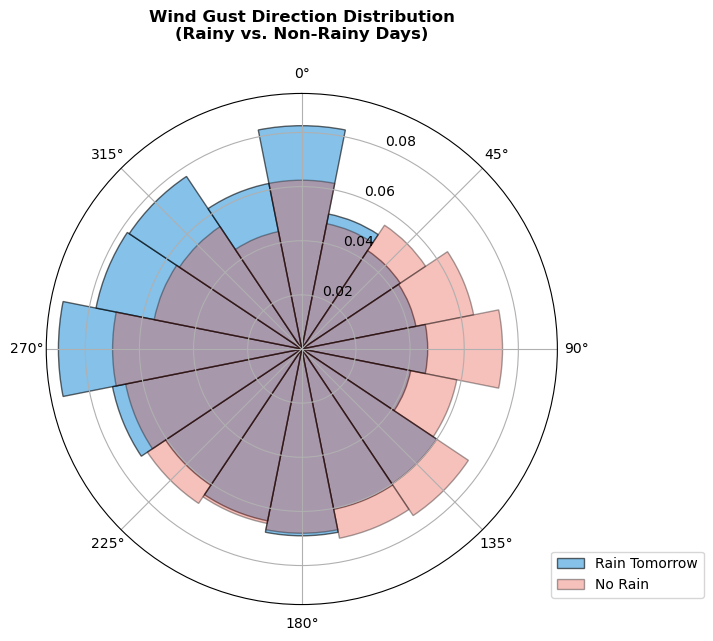

In [20]:
plot_wind_rose_by_rain(df_final)

Biểu đồ Hoa gió (Wind Rose) được sử dụng để mô tả phân bố xác suất của hướng gió giật đỉnh trong hai trạng thái thời tiết đối lập: *có mưa* và *không mưa*. Kết quả trực quan cho thấy sự khác biệt cấu trúc rõ rệt giữa hai phân bố, phản ánh vai trò quan trọng của hướng gió trong việc điều tiết khả năng hình thành mưa.

**Thứ nhất, sự thống trị của gió Tây trong các ngày mưa.**

Trong những ngày có mưa, phân bố hướng gió thể hiện tính định hướng cao, với mật độ xác suất tập trung mạnh vào dải *Tây – Tây Bắc*. Sự tập trung này tạo nên một phân bố bất đẳng hướng rõ ràng, trái ngược với phân bố gần như đồng đều ở các hướng khác. Về mặt khí tượng, trong bối cảnh Nam bán cầu, gió Tây và Tây Bắc thường gắn liền với *dòng Westerlies ôn đới* và sự đi qua của các *front lạnh* xuất phát từ Nam Băng Dương. Đây là những hệ thống quy mô lớn mang theo hơi ẩm và động năng đáng kể, đóng vai trò chủ đạo trong việc kích hoạt các quá trình nâng không khí và hình thành mưa trên diện rộng.

**Thứ hai, dấu hiệu của các chế độ gió khô trong những ngày không mưa.**

Ngược lại, trong các ngày không mưa, phân bố hướng gió giật có xu hướng phân tán hơn và gần với đẳng hướng, với sự nghiêng nhẹ về phía *Đông – Đông Nam*. Kiểu phân bố này thường liên quan đến các chế độ thời tiết ổn định như *gió tín phong* hoặc ảnh hưởng của các hệ thống áp cao, vốn mang theo không khí khô từ nội địa hoặc các luồng khí biển ổn định nhưng thiếu cơ chế hội tụ và thăng giáng đủ mạnh để hình thành mưa.

**Kết luận chung**, phân tích hoa gió cho thấy rằng **hướng gió không chỉ là thông tin phụ trợ mà là một thành phần dự báo then chốt**, có vai trò ngang hàng với cường độ gió. Mưa không đơn thuần gắn với gió mạnh, mà gắn với *gió mạnh từ các hướng động lực đặc thù*, đặc biệt là dải Tây – Tây Bắc. Do đó, việc đưa thông tin hướng gió vào mô hình — thông qua các biến dẫn xuất như *độ lệch hướng gió (WindShift)* hoặc biểu diễn vector là cần thiết để nắm bắt đúng cơ chế vật lý chi phối mối quan hệ giữa động lực gió và mưa.

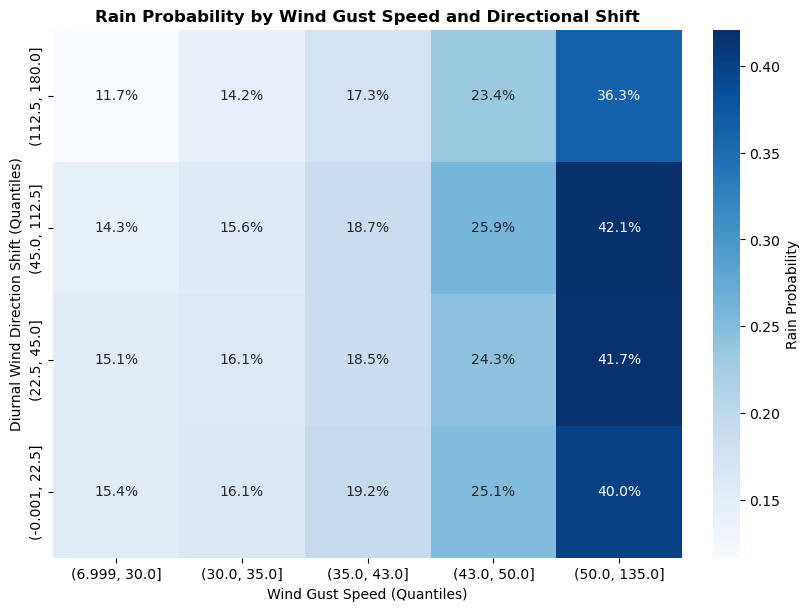

In [21]:
plot_gust_shift_interaction_heatmap(df_final)

Biểu đồ Interaction Heatmap mô tả bề mặt xác suất mưa trong không gian hai chiều, với tốc độ gió giật đỉnh trên trục hoành và độ lệch hướng gió trong ngày trên trục tung. Việc phân tích cấu trúc của bề mặt xác suất này cho thấy mối quan hệ giữa gió và mưa không đơn giản tuyến tính, mà được chi phối bởi ba cơ chế động lực học chính.

**Thứ nhất, vai trò chi phối của động năng khí quyển.**

Quan sát cho thấy sự thay đổi xác suất mưa diễn ra mạnh mẽ nhất theo phương tốc độ gió. Khi tốc độ gió giật tăng từ các phân vị thấp lên phân vị cao nhất (trên 50 km/h), xác suất mưa tăng đáng kể, từ mức nền khoảng 11–15% lên trên 40%. Kết quả này khẳng định rằng *tốc độ gió giật (`WindGustSpeed`) là biến dự báo bậc nhất*, phản ánh trực tiếp mức độ bất ổn định động lực học của khí quyển. Các đợt gió giật mạnh thường đi kèm với những hệ thống thời tiết giàu năng lượng, tạo điều kiện thuận lợi cho đối lưu sâu và sự hình thành mưa.

**Thứ hai, tính hai mặt của sự đổi hướng gió.**

Ảnh hưởng của độ lệch hướng gió không diễn ra một chiều mà phụ thuộc rõ rệt vào cường độ gió. Ở các mức gió yếu, sự thay đổi hướng gió lớn lại đi kèm với sự suy giảm xác suất mưa. Điều này cho thấy trong bối cảnh thiếu động năng, sự xoay chiều gió chủ yếu phản ánh các nhiễu động cục bộ hoặc dòng chảy hỗn loạn khô, không đủ khả năng tạo ra các hệ thống mưa có tổ chức. Ngược lại, khi gió giật mạnh, sự đổi hướng gió đóng vai trò cộng hưởng, làm tăng xác suất mưa, nhưng hiệu ứng này không tăng vô hạn. Xác suất mưa đạt cực đại ở mức đổi hướng trung bình – cao, sau đó giảm nhẹ khi sự đổi hướng trở nên quá cực đoan. Điều này hàm ý rằng không phải mọi biến động hướng gió đều mang ý nghĩa dự báo tích cực.

**Thứ ba, vai trò của cấu hình hội tụ front trong điều kiện gió mạnh.**

Vùng xác suất mưa cao nhất xuất hiện khi *gió giật mạnh kết hợp với sự chuyển hướng gió ở mức vừa phải (khoảng 45° – 90°)*. Đây là cấu hình điển hình của các hệ thống khí tượng có tổ chức, chẳng hạn như sự đi qua của *front lạnh* hoặc rãnh thấp, nơi dòng khí lạnh cắt ngang dòng khí nóng và buộc khối không khí ẩm bị nâng lên. Ngược lại, sự đổi hướng quá lớn trong điều kiện gió rất mạnh có thể phản ánh trạng thái hỗn loạn hơn là hội tụ có cấu trúc, do đó không làm gia tăng xác suất mưa tương ứng.

**Tổng kết**, phân tích heatmap cho thấy mưa không chỉ phụ thuộc vào cường độ gió hay mức độ đổi hướng gió riêng lẻ, mà phụ thuộc vào sự kết hợp tối ưu giữa hai yếu tố này. Điều này củng cố lập luận rằng các chỉ số gió tổng hợp, thay vì từng biến đơn lẻ, là chìa khóa để nắm bắt bản chất phi tuyến của mối quan hệ giữa động lực gió và xác suất mưa.

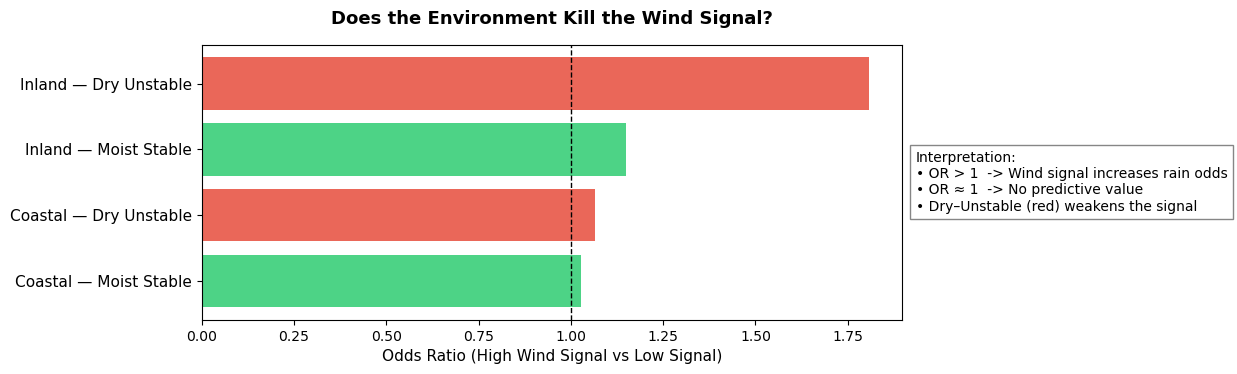

In [22]:
plot_odds_ratio_forest(df_final)

Biểu đồ Forest Plot trình bày *Tỷ số chênh (Odds Ratio – OR)* của tín hiệu động lực gió (kết hợp giữa gió giật và sự đổi hướng gió) trong việc dự báo mưa dưới các điều kiện môi trường khác nhau, được phân tách theo vùng địa lý. Kết quả cho thấy sự khác biệt cấu trúc rõ rệt giữa vùng ven biển và vùng nội địa.

**Thứ nhất, sự suy giảm hiệu lực dự báo tại vùng ven biển.**

Tại khu vực ven biển, các ước lượng OR của tín hiệu gió trong cả hai trạng thái môi trường đều xấp xỉ 1.0, tức gần với đường tham chiếu cho hiệu ứng trung tính. Điều này cho thấy tổ hợp "gió giật mạnh kèm đổi hướng" chỉ mang lại rất ít thông tin bổ sung cho việc dự báo mưa tại đây. Đặc biệt, trong điều kiện không khí khô và bất ổn (Coastal – Dry Unstable), OR chỉ nhỉnh hơn 1 ($\approx$ 1.05), phản ánh rằng xác suất mưa hầu như không thay đổi ngay cả khi tín hiệu gió xuất hiện. Về mặt vật lý, hiện tượng này có thể được giải thích bởi sự phổ biến của các hoàn lưu quy mô nhỏ tại ven biển (như gió đất – gió biển hoặc nhiễu động nhiệt ban ngày), vốn tạo ra gió mạnh và đổi hướng nhưng không nhất thiết đi kèm với hội tụ ẩm hay quá trình nâng không khí đủ mạnh để gây mưa. Do đó, trong bối cảnh này, môi trường khô đóng vai trò như một "bộ lọc", làm suy yếu hoặc vô hiệu hóa giá trị dự báo của tín hiệu động lực học.

**Thứ hai, hiện tượng khuếch đại tín hiệu tại vùng nội địa.**

Ngược lại, tại khu vực nội địa, kết quả cho thấy một khuynh hướng hoàn toàn khác. Trong điều kiện khô và bất ổn (Inland – Dry Unstable), OR của tín hiệu gió đạt giá trị cao nhất (OR > 1.75), cho thấy khả năng dự báo mưa tăng lên rõ rệt khi tín hiệu động lực mạnh xuất hiện. Điều này phản ánh một cơ chế chọn lọc vật lý: trong môi trường nội địa vốn thiếu ẩm, mưa chỉ xảy ra khi tồn tại một lực cưỡng bức động lực học đủ mạnh để vượt qua các rào cản như nghịch nhiệt tầng thấp hoặc quá trình bay hơi mạnh. Do đó, gió giật rất mạnh kèm theo sự thay đổi hướng gió đột ngột trở thành dấu hiệu đặc trưng của các hệ thống đối lưu mạnh hiếm gặp, và vì vậy mang giá trị dự báo cao hơn đáng kể so với các điều kiện môi trường đã ẩm sẵn.

**Tóm lại**, phân tích này xác nhận rằng môi trường nhiệt – ẩm không chỉ đóng vai trò nền, mà còn hoạt động như một cơ chế điều kiện hóa, quyết định khi nào tín hiệu động lực gió có ý nghĩa dự báo và khi nào nó chỉ phản ánh nhiễu khí tượng không liên quan đến mưa.


**Kết luận chính.**

Chỉ số tương tác động lực gió, được xây dựng từ tốc độ gió giật (`WindGustSpeed`) và mức độ biến đổi hướng gió trong ngày (`Diurnal Wind Shift`), *không phải là một chỉ báo dự báo mưa mang tính phổ quát và độc lập*. Hiệu lực dự báo của chỉ số này *phụ thuộc phi tuyến* vào cả trạng thái nhiệt – ẩm của khí quyển và bối cảnh địa lý, thông qua các cơ chế điều biến khác nhau giữa vùng ven biển và vùng nội địa.

Cụ thể, **tại các khu vực ven biển**, tín hiệu động lực học của gió thể hiện độ tin cậy thấp. Trong môi trường khô, các quá trình hoàn lưu quy mô nhỏ đặc trưng cho vùng duyên hải thường tạo ra gió mạnh và sự đổi hướng gió đáng kể nhưng không đi kèm với hội tụ ẩm hoặc nâng động lực đủ mạnh để hình thành mưa. Do đó, trạng thái khí quyển khô tại ven biển đóng vai trò như một cơ chế *sàng lọc*, làm suy giảm hoặc triệt tiêu giá trị dự báo của tín hiệu gió và làm gia tăng nguy cơ cảnh báo sai.

Ngược lại, **tại các khu vực nội địa**, mối quan hệ này thể hiện chiều hướng đối lập. Trong điều kiện khô và nóng, sự xuất hiện của gió giật mạnh kết hợp với sự thay đổi hướng gió rõ rệt lại trở thành một chỉ dấu động lực học có tính chẩn đoán cao. Sự khan hiếm độ ẩm khiến cho mưa chỉ có thể xảy ra khi tồn tại lực cưỡng bức động lực đủ mạnh để vượt qua các rào cản khí quyển tầng thấp. Trong bối cảnh đó, tín hiệu gió không bị triệt tiêu mà ngược lại, phản ánh sự hiện diện của các hệ thống đối lưu mạnh hiếm gặp và do đó mang giá trị dự báo cao hơn.

#### **2. Practical Meaning & Implications**

Các kết quả định lượng của câu hỏi này cung cấp cơ sở khoa học rõ ràng để điều chỉnh các quy trình dự báo và vận hành theo hướng thích ứng với ngữ cảnh không gian, thay vì áp dụng các quy tắc cố định và đồng nhất. Trọng tâm của hàm ý quản trị nằm ở việc chuyển từ cách tiếp cận "một ngưỡng cho mọi nơi" sang chiến lược thích ứng theo bối cảnh địa lý và môi trường. Cụ thể, các hệ thống hỗ trợ ra quyết định trong dự báo thời tiết, quản lý rủi ro thiên tai và vận hành năng lượng gió cần được thiết kế để tách biệt vai trò của tín hiệu gió theo vùng khí hậu và trạng thái nhiệt – ẩm nền.

Tại các khu vực ven biển, kết quả cho thấy việc tích hợp cơ chế "lọc nhiễu theo độ ẩm" là cần thiết. Trong điều kiện không khí khô, các tín hiệu gió giật và đổi hướng nên được xem chủ yếu là đặc trưng của hoàn lưu gió biển địa phương, thay vì tiền tố của mưa hay bão đối lưu. Việc chủ động hạ thấp trọng số của tín hiệu gió trong những bối cảnh này giúp giảm thiểu báo động giả và các quyết định vận hành tốn kém không cần thiết, chẳng hạn như việc dừng tuabin điện gió một cách thận trọng quá mức. Ngược lại, tại các vùng nội địa, câu hỏi chỉ ra rằng các sự kiện gió giật mạnh đi kèm với sự thay đổi hướng đột ngột, ngay cả trong điều kiện khô nóng, cần được xem là tín hiệu cảnh báo sớm có giá trị cao cho các hiện tượng đối lưu mạnh. Trong bối cảnh này, gió không đóng vai trò là nhiễu, mà là biểu hiện của sự giải phóng năng lượng động lực học tích tụ, đòi hỏi các giao thức "cảnh giác cao độ" trong vận hành và quản lý rủi ro.

Ở cấp độ mô hình hóa, các hệ thống dự báo tức thời có thể cải thiện hiệu năng bằng cách sử dụng biến tương tác giữa tốc độ gió giật và độ lệch hướng gió như một đặc trưng đầu vào trọng yếu, với điều kiện trọng số của biến này được điều chỉnh theo vị trí địa lý. Cách tiếp cận này đặc biệt hữu ích tại các khu vực có độ che phủ radar hạn chế, nơi các trạm quan trắc bề mặt vẫn là nguồn thông tin chính cho dự báo ngắn hạn.

#### **3. Surprises & Limitations**

**Surprise**

Một phát hiện đáng chú ý và có phần phản trực giác của câu hỏi là hiện tượng "khuếch đại trong điều kiện khô" tại vùng nội địa. Trái với kỳ vọng ban đầu rằng môi trường khô sẽ làm suy yếu hoàn toàn tín hiệu gió, kết quả cho thấy trong bối cảnh nội địa, chính sự khan hiếm độ ẩm lại làm nổi bật vai trò chẩn đoán của các tín hiệu động lực học mạnh. Về mặt thống kê, tín hiệu gió trong điều kiện khô tại nội địa có tỷ số chênh cao hơn đáng kể so với điều kiện ẩm, cho thấy chỉ những hệ thống thời tiết có động năng rất lớn mới đủ khả năng vượt qua rào cản bay hơi để tạo mưa. Điều này khiến tổ hợp "gió giật + đổi hướng" trở thành một bộ phân loại hiệu quả cho các sự kiện mưa hiếm nhưng có cường độ cao, thay vì một chỉ báo nền phổ thông.

**Limitations**

* Thứ nhất, độ phân giải thời gian của dữ liệu là một điểm hạn chế quan trọng. Việc chỉ sử dụng hai thời điểm quan trắc trong ngày (9h và 15h) khiến độ lệch hướng gió được sử dụng như một đại diện thô cho sự thay đổi động lực học, có thể bỏ sót các biến động nhanh hoặc các sự kiện gió giật ngắn hạn vốn đặc trưng cho dông đối lưu. 
* Thứ hai, câu hỏi chỉ dựa trên các quan trắc bề mặt, trong khi nhiều cơ chế gây mưa, đặc biệt là đối lưu sâu, chịu chi phối mạnh bởi các quá trình tầng cao như độ bất ổn khí quyển hay dòng xiết. Việc thiếu thông tin thám không hạn chế khả năng liên kết trực tiếp giữa tín hiệu gió bề mặt và động lực học khí quyển ba chiều, đồng thời mở ra hướng nghiên cứu tiếp theo nhằm tích hợp dữ liệu tầng cao để hoàn thiện bức tranh cơ chế vật lý.